## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [81]:
# Caminho do arquivo
url = "aptos.csv"

# Lê e carrega o arquivo para a memória
df = pd.read_csv(url)

In [82]:
#head(): mostras as 15 primeiras linhas

df.head(15)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


In [83]:
# Mostra informações sobre o dataframe em si

#100 linhas / 100 valores não-nulos / 5 atributos do tipo int64 e 1 do tipo object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   metros     100 non-null    int64 
 1   valor      100 non-null    int64 
 2   quartos    100 non-null    int64 
 3   vagas      100 non-null    int64 
 4   reformado  100 non-null    int64 
 5   bairro     100 non-null    object
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [84]:
#tail(): mostra as 5 últimas linhas

df.tail()

,metros,valor,quartos,vagas,reformado,bairro
95,100,422,3,2,1,Baeta Neves
96,105,659,3,2,1,Rudge Ramos
97,55,200,2,0,1,Iraja
98,53,220,2,1,1,Santa Teresinha
99,58,200,2,1,0,Santa Teresinha


In [85]:
# exibe o shape (dimensoẽs) do dataframe -> (linhas,colunas)
#Resposta: 100 linhas e 6 colunas

df.shape

(100, 6)

In [86]:
# class distribution

#mostra a distribuição dos valores nas classes
print(df.groupby('bairro').size())

bairro
Assuncao            9
Baeta Neves        15
Centro             29
Demarchi            5
Ferrazopolis        3
Independencia       3
Iraja               2
Jardim do Mar       2
Jordanopolis        1
Nova Petropolis     3
Pauliceia           2
Piraporinha         1
Planalto            4
Rudge Ramos         8
Santa Teresinha     3
Taboao              4
Vila Lusitania      6
dtype: int64


In [87]:
#describe(): resumo de cada  coluna númerica

df.describe()

,metros,valor,quartos,vagas,reformado
count,100.000000,100.00000,100.000000,100.000000,100.000000
mean,80.280000,402.93000,2.590000,1.650000,0.540000
std,27.606206,171.43154,0.552222,0.687184,0.500908
min,43.000000,188.00000,2.000000,0.000000,0.000000
25%,56.750000,258.00000,2.000000,1.000000,0.000000
50%,72.000000,355.00000,3.000000,2.000000,1.000000
75%,100.000000,515.00000,3.000000,2.000000,1.000000
max,199.000000,880.00000,4.000000,4.000000,1.000000


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

- ..:.metro : metros de cada apartamento
- ..:.valor : valor do apartamento
- ..:.quartos : quantidade de quartos de cada apartamento
- ..:.vagas : quantidade de vagas de estacionamento
- ..:.reformado : se foi reformado 1 para sim e 0 para não
- ..:.bairro : bairro onde esta localizado o apartamento.

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1. ...quanto maior o apartamento maior seu valor
2. ...o número de apartamento reformados é maior que os não reformados

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

# **Cenário 1**
**1 -** No gráfico que compara o valor(y) com metros(x) é possível analisar que quanto maior a metragem do apartamento,
maior será seu valor. No entanto também é possível observar, que apartamentos do mesmo tamanho podem ter valores 
diferentes.

# **Cenário 2**
**2 -** No gráfico que compara o apartamento com ele mesmo, nota-se que o número de apartamentos reformados(1) é maior
comparado ao de não reformados(0).

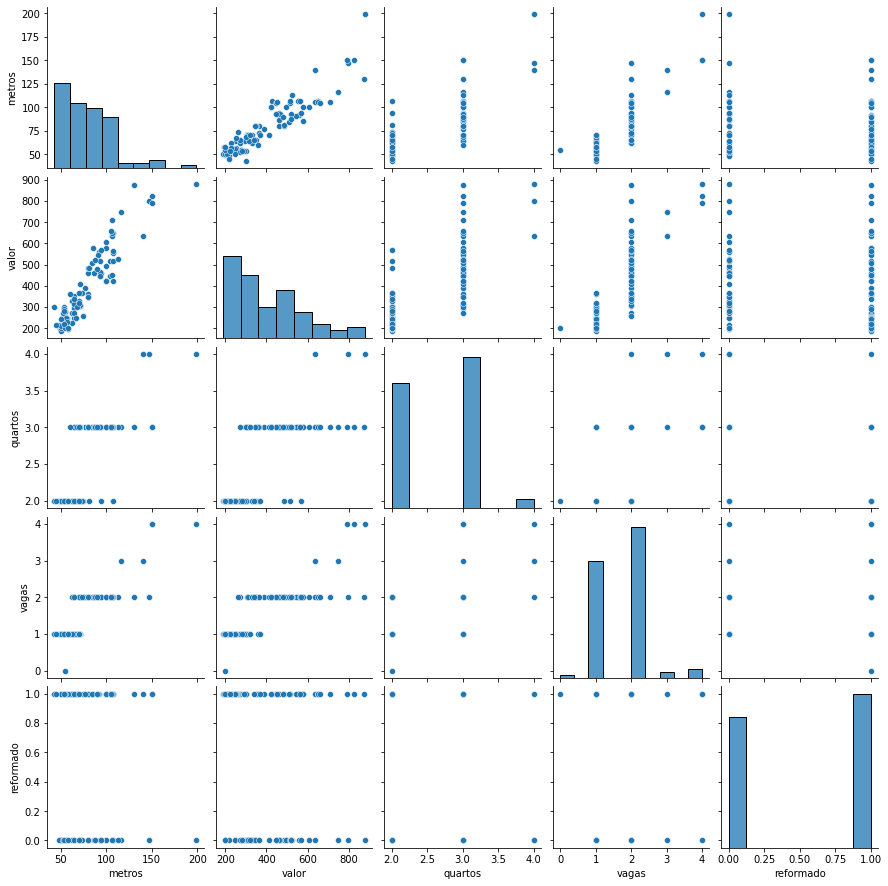

In [88]:
#Seu Código aqui...
sns.pairplot(df)


<AxesSubplot:xlabel='metros', ylabel='valor'>

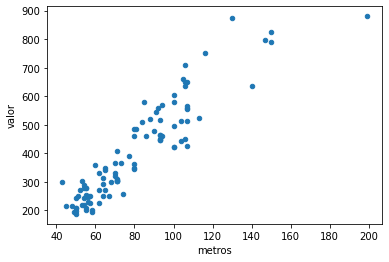

In [18]:
#Seu Código aqui...

#Comparando metros(x) e valor(y)

df.plot.scatter('metros', 'valor')



d:\users\gabriel\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
d:\users\gabriel\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
d:\users\gabriel\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
d:\users\gabriel\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


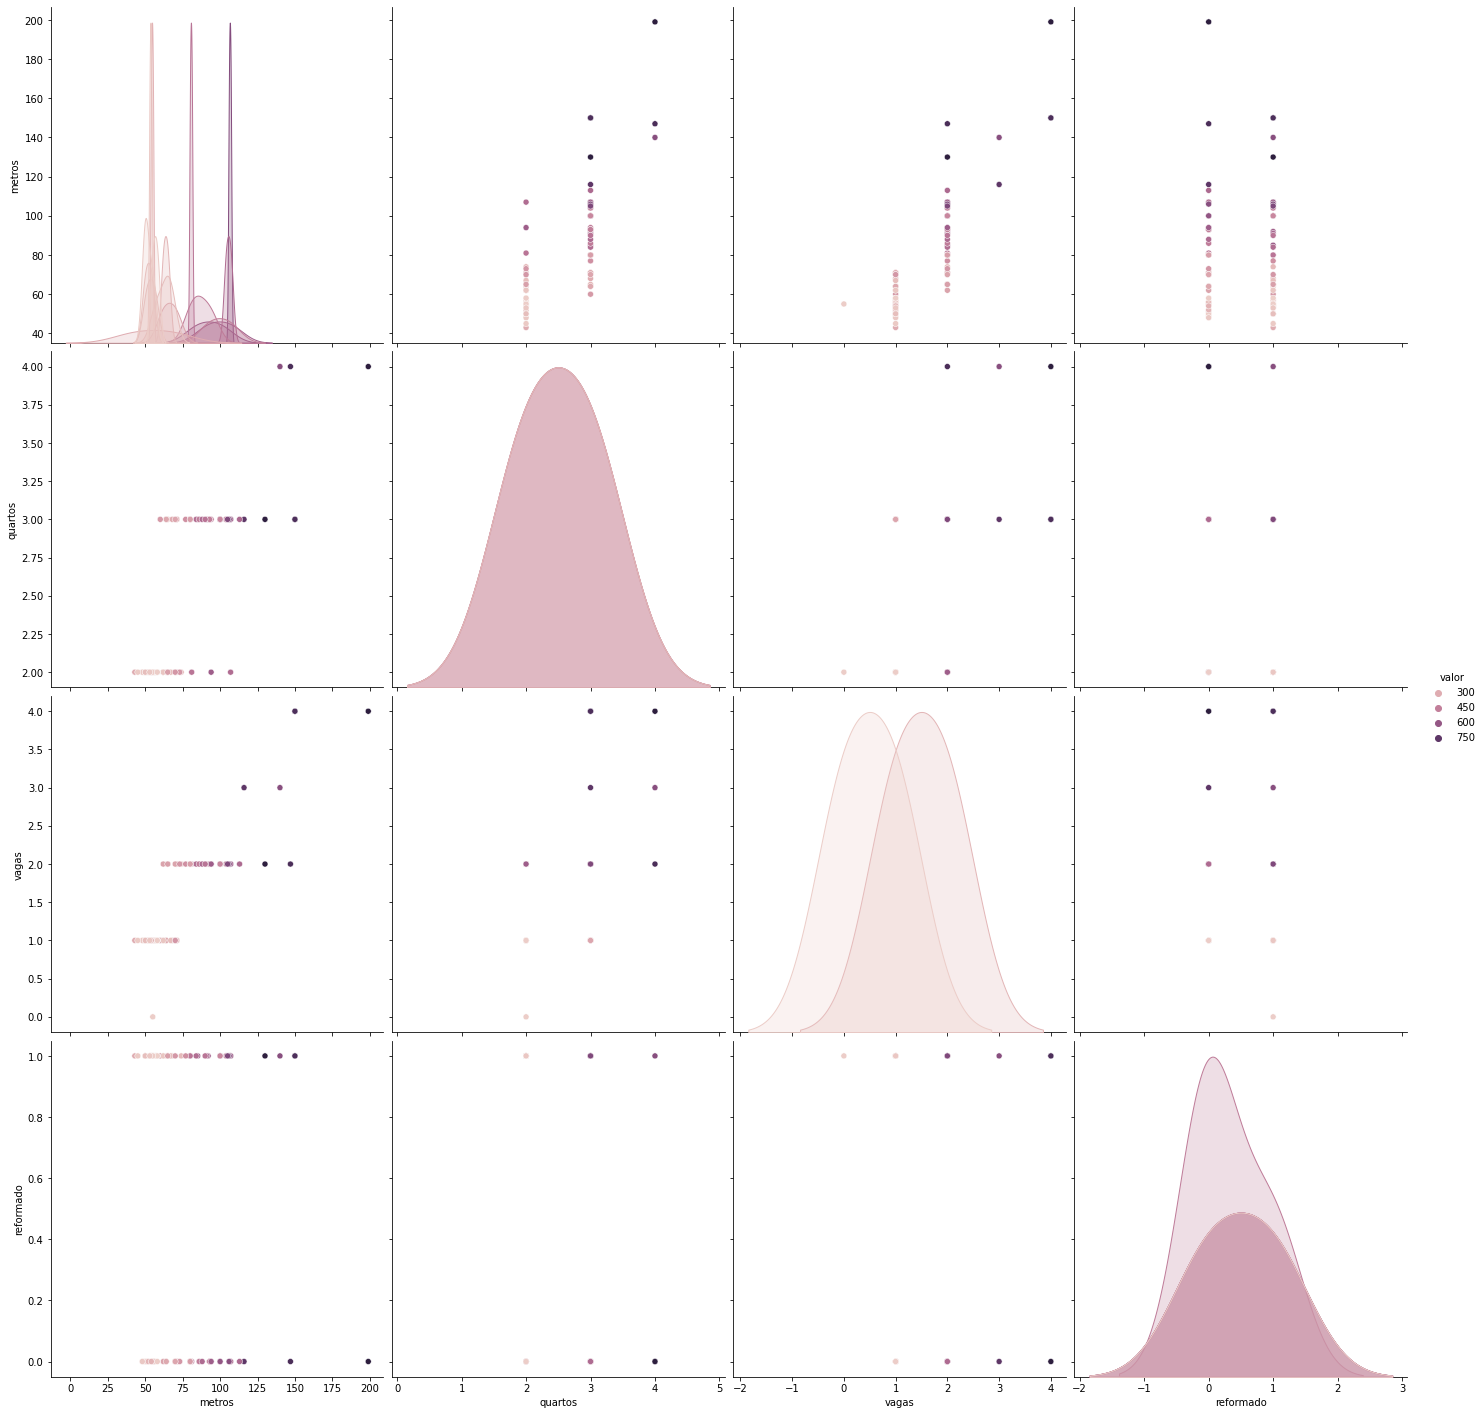

In [41]:
# A cor vem do campo `valor` do dataframe
sns.pairplot(df, hue='valor', height=5)
plt.show()

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo ...Regressão Linear
2. algoritimo ...Regressão Polinomial

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. algoritimo ... Regressão Linear: É uma técnica que consiste em representar um conjunto de dados por meio de uma reta. A e B são constantes que determinam a posição e inclinação da reta. Para cada valor de X temos um Y associado.


2. algoritimo ...Regressão Polinomial: A, B e C são constantes que determinam a posição e inclinação da curva, o 2 indica o grau do polinômio. Para cada valor de X temos um Y associado.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

In [67]:
# Vamos treinar nosso modelo com 2 dois atributos independentes
# para predizer o valor de saida
X = df[['metros', 'quartos', 'vagas', 'reformado']]

Y = df['valor']

print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")

Formato das tabelas de dados (100, 4) e saidas (100,)


### Algoritmo 1

In [68]:
# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(80, 4)
(20, 4)
(80,)
(20,)


In [69]:
#Primeiras linhas do dataframe 
X_treino.head()

,metros,quartos,vagas,reformado
28,55,2,1,0
13,71,3,1,0
27,71,2,1,0
43,71,3,2,0
80,86,3,2,0


In [70]:
Y_treino.head()

28    280
13    303
27    306
43    304
80    460
Name: valor, dtype: int64

In [71]:
# Importa a biblioteca
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cria o modelo de regressão 
lin_model = LinearRegression()

# Cria o modelo de machine learning
lin_model.fit(X_treino, Y_treino)

LinearRegression()

In [72]:
# Para obter as previsões, basta chamar o método predict()
y_teste_predito = lin_model.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))

Predição usando regressão, retorna valores continuos: [ 550.83827098  377.79558071  254.30129536 1085.73690035  418.07925348
  234.63329276  529.59994481  418.07925348  539.4339461   301.07229236
  195.29728758  516.41926644  219.88229082  411.59192925  657.44196166
  249.38429471  221.4526144   465.67893638  303.47130184  545.92127033]


In [73]:
# vamos avaliar os parametros do nosso modelo
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_LSTAT + {} * X_RM'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else: 
        print('Nossa equação é: Y_pred = {} + {} * X_LSTAT'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))


(A) Intercepto:  -69.54470457614104
(B) Inclinação:  [ 4.91700065  5.86466823 38.33495075 -6.48732423]
Nossa equação é: Y_pred = -69.54 + 4.92 * X_LSTAT + 5.86 * X_RM


Text(0, 0.5, 'Valor Predito')

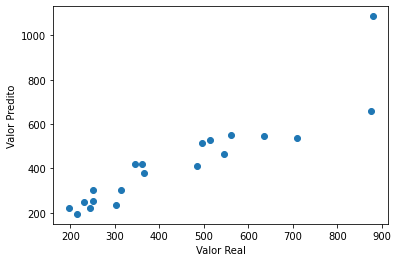

In [74]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

X_train = df['valor']
y_train = df['metros']

model = keras.Sequential([
    layers.Dense(units=1, input_shape=[1])
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss = 'mse')

In [77]:
epochs_hist = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 1ms/step - loss: 4719.9468
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 2676.5166
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 1326.7731
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 541.8992
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 216.8603
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 190.1633
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 273.9236
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 318.8252
Epoch 9/200
4/4 [==============================] - 0s 997us/step - loss: 284.1374
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 221.8446
Epoch 11/200
4/4 [==============================] - 0s 836us/step - loss: 186.2524
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 178.8843
Epoch 13/200
4/4 [============

4/4 [==============================] - 0s 2ms/step - loss: 173.0656
Epoch 102/200
4/4 [==============================] - 0s 997us/step - loss: 171.2456
Epoch 103/200
4/4 [==============================] - 0s 998us/step - loss: 172.3335
Epoch 104/200
4/4 [==============================] - 0s 997us/step - loss: 174.1427
Epoch 105/200
4/4 [==============================] - 0s 2ms/step - loss: 172.2170
Epoch 106/200
4/4 [==============================] - 0s 1ms/step - loss: 172.2393
Epoch 107/200
4/4 [==============================] - 0s 997us/step - loss: 170.3009
Epoch 108/200
4/4 [==============================] - 0s 2ms/step - loss: 170.4663
Epoch 109/200
4/4 [==============================] - 0s 997us/step - loss: 172.3829
Epoch 110/200
4/4 [==============================] - 0s 2ms/step - loss: 174.9994
Epoch 111/200
4/4 [==============================] - 0s 997us/step - loss: 173.4043
Epoch 112/200
4/4 [==============================] - 0s 997us/step - loss: 171.2277
Epoch 113/200
4/

4/4 [==============================] - 0s 997us/step - loss: 172.8499


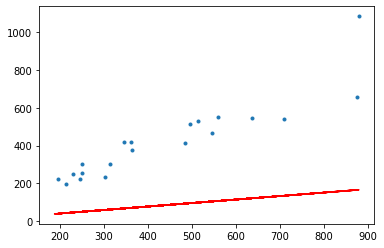

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# plot prediction and actual data
y_teste_predito = lin_model.predict(X_teste)

plt.plot(Y_teste, y_teste_predito, '.')

# plot a line, a perfit predict would all fall on this line
#x = np.linspace(0, 50, 100)
#y = x
#plt.plot(x, y)
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.show()

In [79]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

Soma dos Erros ao Quadrado (SSE): 157604 
Erro Quadrático Médio (MSE): 7880.22
Erro Médio Absoluto (MAE): 62.63
Raiz do Erro Quadrático Médio (RMSE): 88.77 
R2-score: 0.81


### Algoritmo 2

Soma dos Erros ao Quadrado (SSE): 374884 
Erro Quadrático Médio (MSE): 3748.84
Erro Médio Absoluto (MAE): 48.70
Raiz do Erro Quadrático Médio (RMSE): 61.23 
R2-score: 0.87


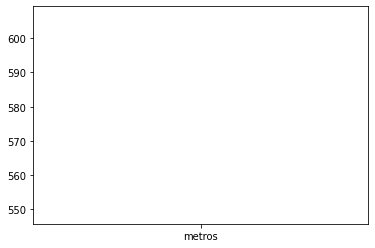

In [89]:
#Seu Código aqui...
#Regressão Polinomial

import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# importa feature polinomial
from sklearn.preprocessing import PolynomialFeatures

# ajuste nos dados, pois estamos trabalhando com a numpy 
x = df[['metros']]
y = df['valor']

#----É aqui que o seu código muda

# Chama a função definindo o grau do polinomio e aplica o modelo
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

#----Pronto agora é tudo como era antes, com regressão linear


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Métrica de avaliação do modelo
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_poly_pred - y)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y,y_poly_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y, y_poly_pred)))
print("R2-score: %.2f" % r2_score(y,y_poly_pred) )


plt.scatter(x, y, s=10)
# ordena os valores de x antes de plotar
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='m')
plt.show()

Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | X | X |
| teste  | X | X |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** De acordo com a escala R² de performance, em quanto mais próximo de 1 melhor, é possível observar que o algoritmo2 teve um resultado melhor.

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [90]:
#Seu Código aqui...

print(df.query('bairro=="Centro" & metros == 65 & quartos == 2 & vagas == 2 & reformado == 1'))



    metros  valor  quartos  vagas  reformado  bairro
12      65    350        2      2          1  Centro


Resposta: Um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro custa R$350.000

## 5. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Não, pois não conseguimos visualizar muito bem o que podemos aprender com as informações geradas pelo modelo desenvolvido.

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Poderiamos tentar usar outros modelos e gráficos.




